##### Q1 : A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.


In [1]:
### alpha value = 0.025

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
cutlets = pd.read_csv('../Assignment 3-Hypothesis Testing/Cutlets.csv')
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [4]:
cutlets

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [5]:
cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [6]:
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 692.0 bytes


In [7]:
p_value = stats.ttest_ind(cutlets['Unit A'],cutlets['Unit B'], alternative='two-sided')

In [8]:
p_value

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

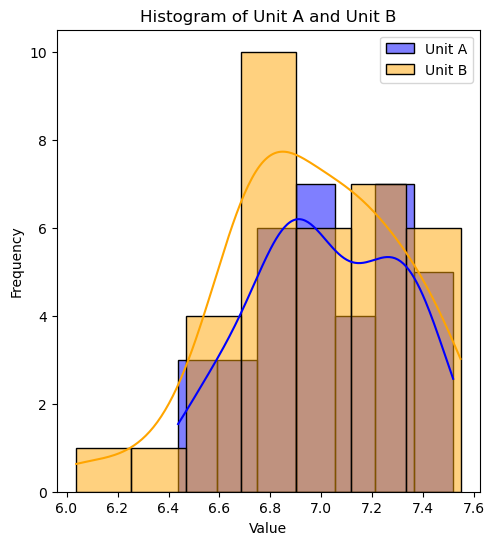

In [9]:
import seaborn as sns
# Visualize distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(cutlets['Unit A'], kde=True, color='blue', label='Unit A')
sns.histplot(cutlets['Unit B'], kde=True, color='orange', label='Unit B')
plt.title('Histogram of Unit A and Unit B')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

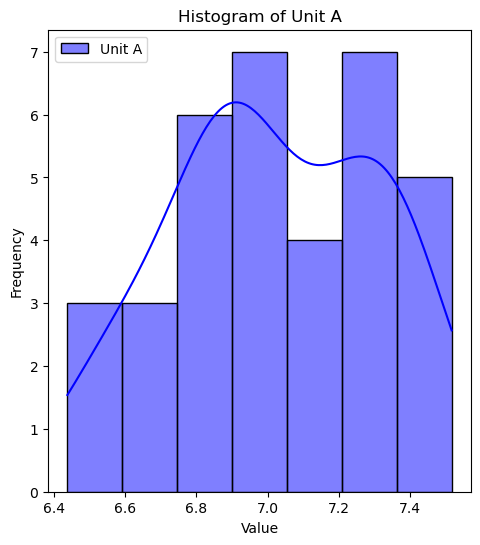

In [10]:
# Visualize distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(cutlets['Unit A'], kde=True, color='blue', label='Unit A')
plt.title('Histogram of Unit A')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

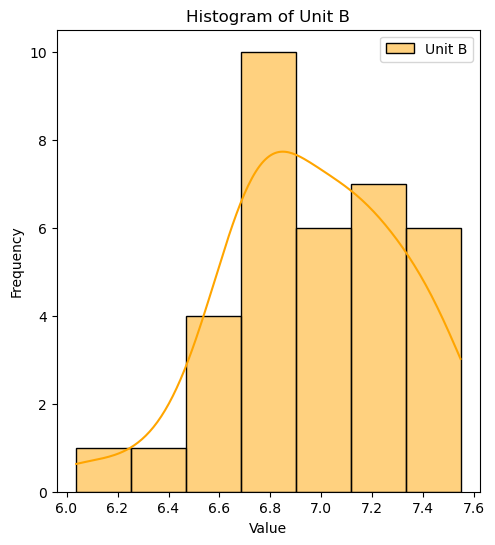

In [11]:
# Visualize distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(cutlets['Unit B'], kde=True, color='orange', label='Unit B')
plt.title('Histogram of Unit B')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

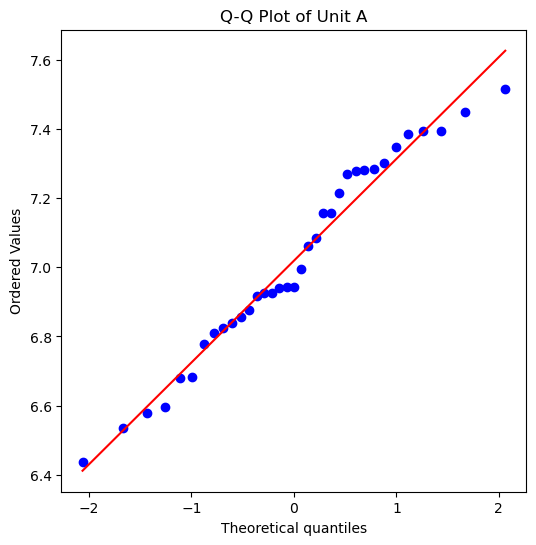

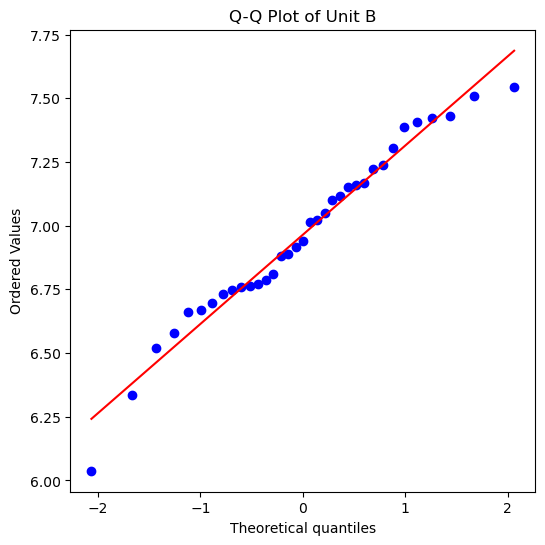

In [12]:
# Check for normality
plt.figure(figsize=(6, 6))
stats.probplot(cutlets['Unit A'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Unit A')
plt.show()
plt.figure(figsize=(6, 6))
stats.probplot(cutlets['Unit B'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Unit B')
plt.show()

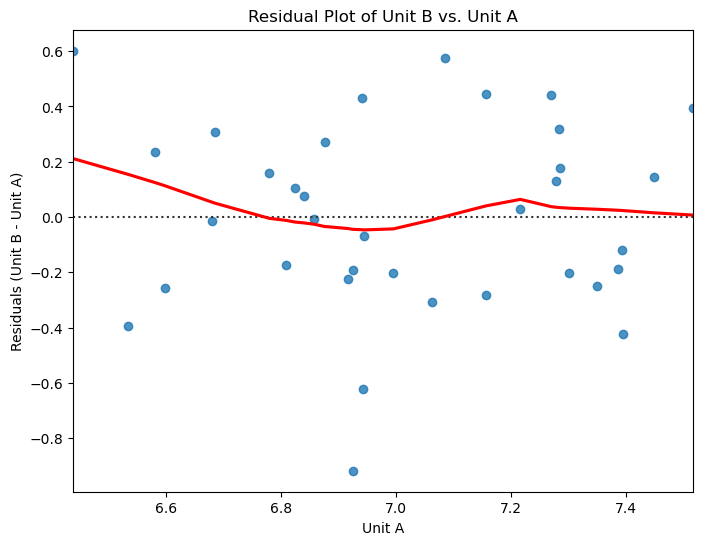

In [14]:
# Check for homoscedasticity
plt.figure(figsize=(8, 6))
sns.residplot(x=cutlets['Unit A'], y=cutlets['Unit B'] - cutlets['Unit A'], lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot of Unit B vs. Unit A')
plt.xlabel('Unit A')
plt.ylabel('Residuals (Unit B - Unit A)')
plt.show()

In [15]:
# Get Random Sample (e.g., 10 rows)
random_sample_a = cutlets['Unit A'].sample(n=10)  # Change 10 to the number of rows you want in your sample
print(random_sample_a.mean())
print(round(random_sample_a.mean(),2))
print(random_sample_a.std())
round(random_sample_a.std(),2)

6.99442
6.99
0.30940908483394247


0.31

In [16]:
random_sample_b=cutlets['Unit B'].sample(n=10)
print(random_sample_b)
print(random_sample_b.mean())
print(round(random_sample_b.mean(),2))
print(random_sample_b.std())
print(round(random_sample_b.std(),2))

25    6.9399
34    7.3875
8     7.2402
1     7.5093
10    6.8810
5     6.8110
29    7.5459
15    7.0240
0     6.7703
13    6.0380
Name: Unit B, dtype: float64
7.014710000000001
7.01
0.4466365473675932
0.45


In [17]:
t_statistic, p_value1 = stats.ttest_ind(random_sample_a,random_sample_b)
t_statistic,p_value1

(-0.11808928483527742, 0.9073047213292376)

In [18]:
if p_value1 < 0.05:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")

Fail to reject the null hypothesis. There is no significant difference.


#####  Q2:A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch. Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

In [19]:
## alpha = 0.05

In [20]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm

In [21]:
lab = pd.read_csv('../Assignment 3-Hypothesis Testing/Labtat.csv')
lab.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [22]:
lab

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [23]:
lab.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [24]:
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


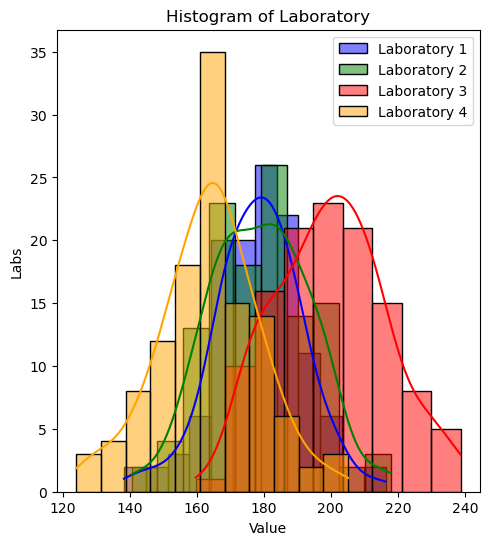

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(lab['Laboratory 1'], kde=True, color='blue', label='Laboratory 1')
sns.histplot(lab['Laboratory 2'], kde=True, color='green', label='Laboratory 2')
sns.histplot(lab['Laboratory 3'], kde=True, color='red', label='Laboratory 3')
sns.histplot(lab['Laboratory 4'], kde=True, color='orange', label='Laboratory 4')
plt.title('Histogram of Laboratory')
plt.xlabel('Value')
plt.ylabel('Labs')
plt.legend()

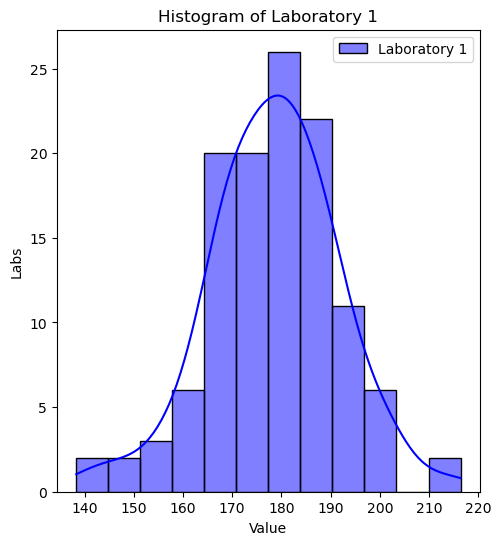

In [26]:
# Visualize distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(lab['Laboratory 1'], kde=True, color='blue', label='Laboratory 1')
plt.title('Histogram of Laboratory 1')
plt.xlabel('Value')
plt.ylabel('Labs')
plt.legend()

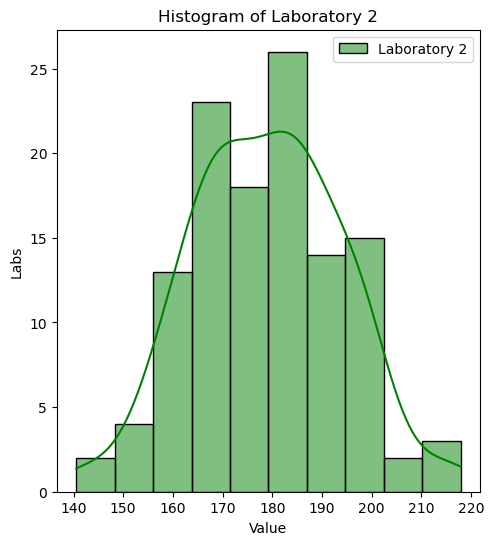

In [27]:
# Visualize distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(lab['Laboratory 2'], kde=True, color='green', label='Laboratory 2')
plt.title('Histogram of Laboratory 2')
plt.xlabel('Value')
plt.ylabel('Labs')
plt.legend()

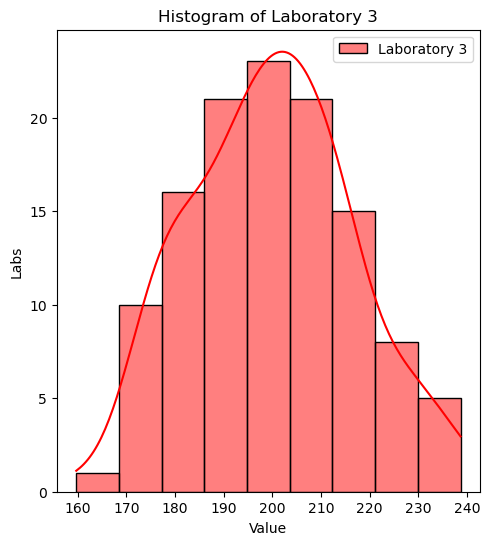

In [28]:
# Visualize distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(lab['Laboratory 3'], kde=True, color='red', label='Laboratory 3')
plt.title('Histogram of Laboratory 3')
plt.xlabel('Value')
plt.ylabel('Labs')
plt.legend()

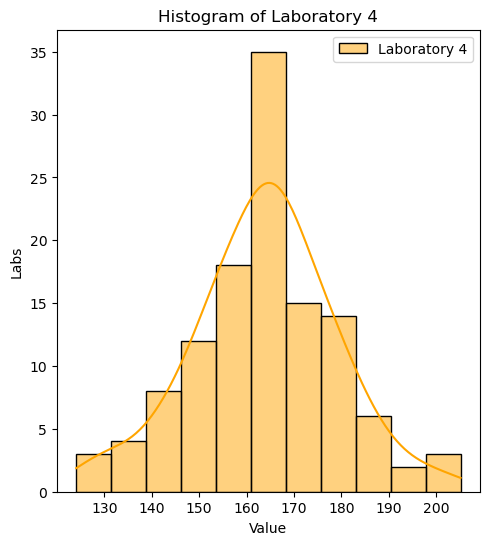

In [29]:
# Visualize distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(lab['Laboratory 4'], kde=True, color='orange', label='Laboratory 4')
plt.title('Histogram of Laboratory 4')
plt.xlabel('Value')
plt.ylabel('Labs')
plt.legend()

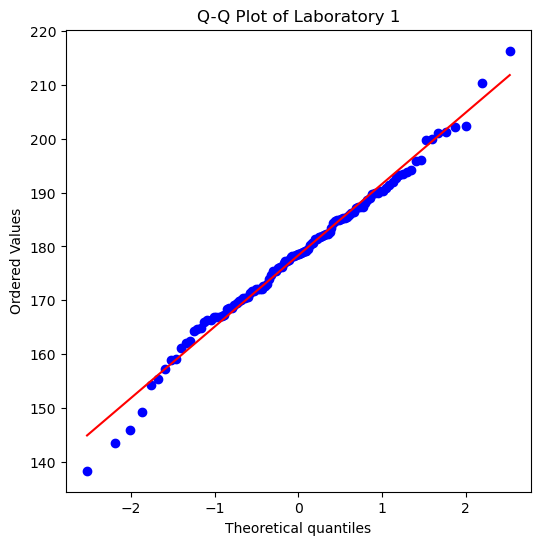

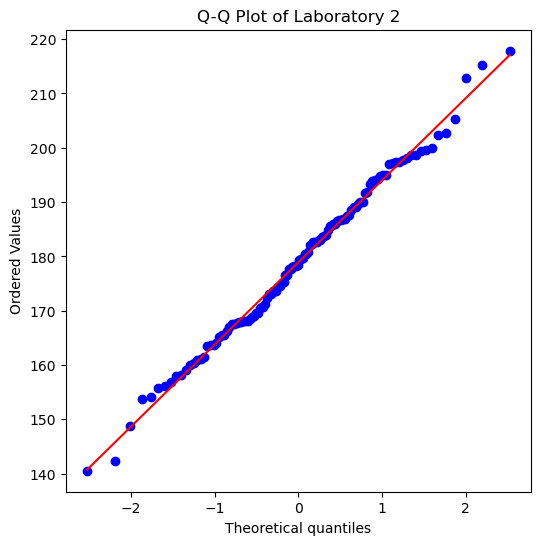

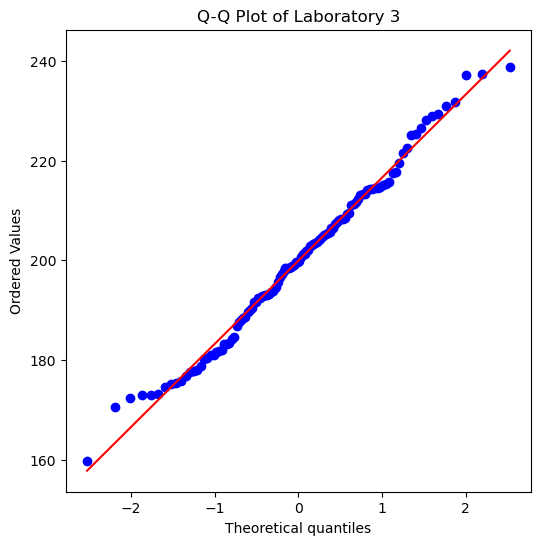

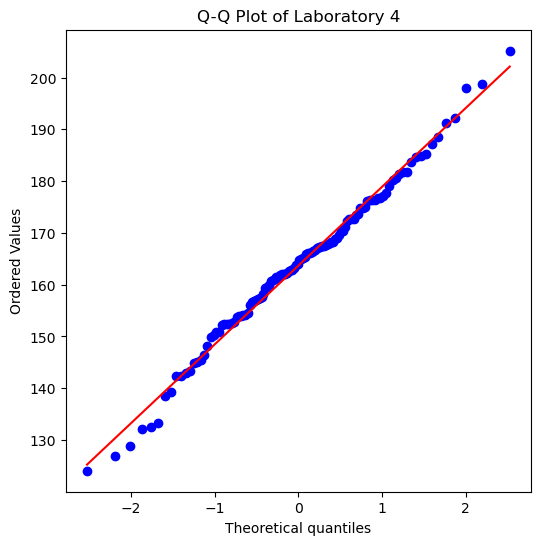

In [30]:
# Check for normality Laboratory 1
plt.figure(figsize=(6, 6))
stats.probplot(lab['Laboratory 1'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Laboratory 1')
plt.show()
# Check for normality Laboratory 2
plt.figure(figsize=(6, 6))
stats.probplot(lab['Laboratory 2'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Laboratory 2')
plt.show()
# Check for normality Laboratory 3
plt.figure(figsize=(6, 6))
stats.probplot(lab['Laboratory 3'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Laboratory 3')
plt.show()
# Check for normality Laboratory 4
plt.figure(figsize=(6, 6))
stats.probplot(lab['Laboratory 4'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Laboratory 4')
plt.show()

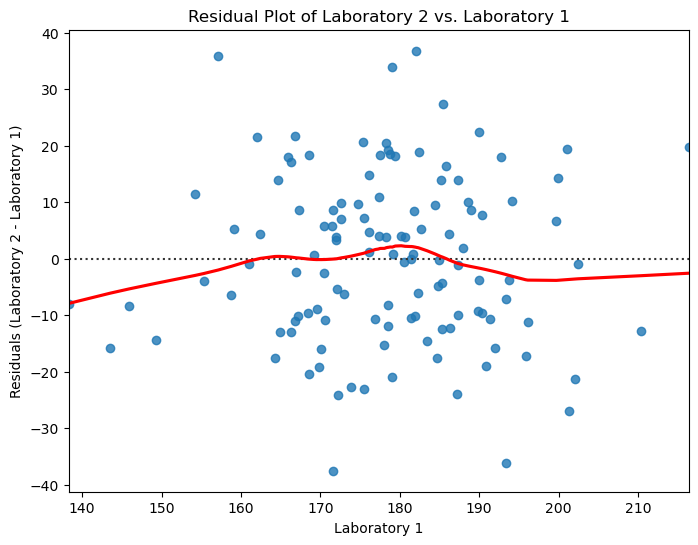

In [31]:
# Calculate the residuals
residuals = lab['Laboratory 2'] - lab['Laboratory 1']

# Plot residuals
plt.figure(figsize=(8, 6))
sns.residplot(x=lab['Laboratory 1'], y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot of Laboratory 2 vs. Laboratory 1')
plt.xlabel('Laboratory 1')
plt.ylabel('Residuals (Laboratory 2 - Laboratory 1)')
plt.show()

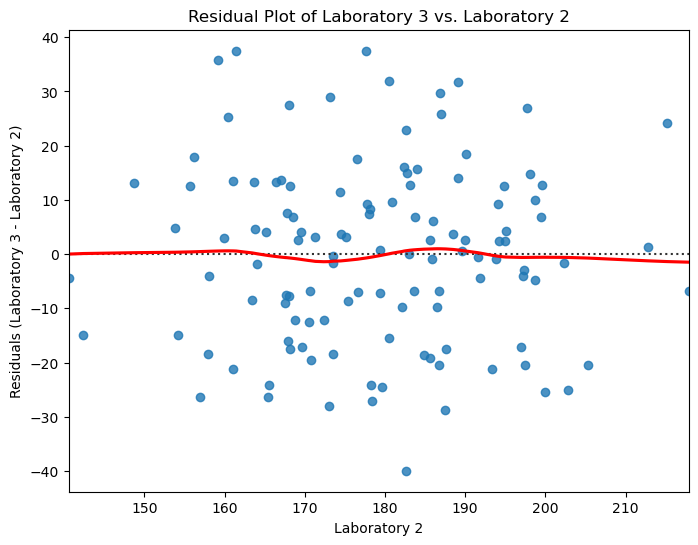

In [32]:
# Calculate the residuals
residuals = lab['Laboratory 3'] - lab['Laboratory 2']

# Plot residuals
plt.figure(figsize=(8, 6))
sns.residplot(x=lab['Laboratory 2'], y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot of Laboratory 3 vs. Laboratory 2')
plt.xlabel('Laboratory 2')
plt.ylabel('Residuals (Laboratory 3 - Laboratory 2)')
plt.show()

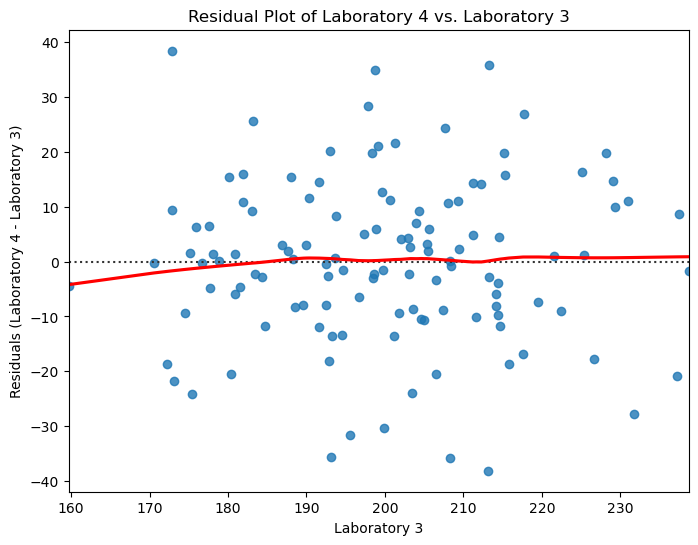

In [33]:
# Calculate the residuals
residuals = lab['Laboratory 4'] - lab['Laboratory 3']

# Plot residuals
plt.figure(figsize=(8, 6))
sns.residplot(x=lab['Laboratory 3'], y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot of Laboratory 4 vs. Laboratory 3')
plt.xlabel('Laboratory 3')
plt.ylabel('Residuals (Laboratory 4 - Laboratory 3)')
plt.show()

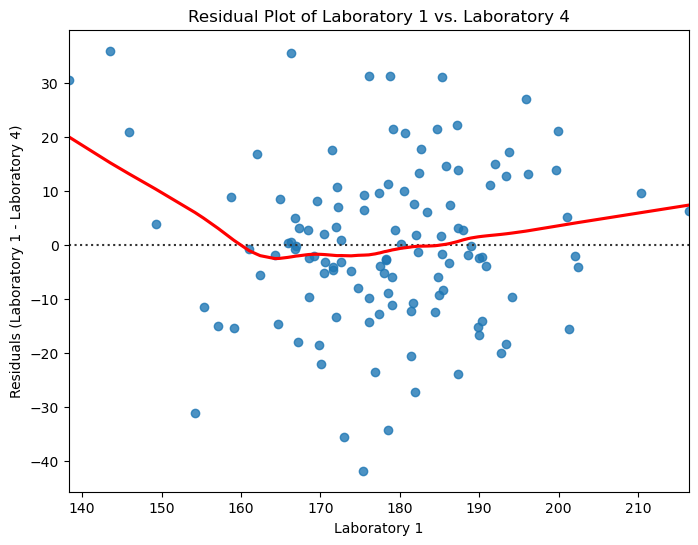

In [34]:
# Calculate the residuals
residuals = lab['Laboratory 1'] - lab['Laboratory 4']

# Plot residuals
plt.figure(figsize=(8, 6))
sns.residplot(x=lab['Laboratory 1'], y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot of Laboratory 1 vs. Laboratory 4')
plt.xlabel('Laboratory 1')
plt.ylabel('Residuals (Laboratory 1 - Laboratory 4)')
plt.show()

In [35]:
lab.iloc[:,0]

0      185.35
1      170.49
2      192.77
3      177.33
4      193.41
        ...  
115    178.49
116    176.08
117    202.48
118    182.40
119    182.09
Name: Laboratory 1, Length: 120, dtype: float64

In [36]:
lab_p_value = stats.f_oneway(lab.iloc[:,0],lab.iloc[:,1],lab.iloc[:,2],lab.iloc[:,3])

In [37]:
lab_p_value

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

#### Since alpha value is 0.05 and lab_p_value is 2.11 which is almost equal to zero, Hence we Reject null hypothesis, which means there is significance difference between the TAT of reports of the Laboratories.

##### Q3:Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

  ####             East West North South
##### Males   50   142  131   70
##### Females 550  351  480  350
 
 H0 =  All proportions are equal
 HA =  Not all proportions are equal
 
 1. Check P_value
 2. if p_value < alpha, we reject null hypothesis
 


In [38]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm

In [39]:
buyers = pd.read_csv('../Assignment 3-Hypothesis Testing/BuyerRatio.csv')
buyers.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [40]:
# Assuming you have the sales data for males and females in four regions
# Create a contingency table with the observed frequencies

observed_freq = np.array([[50,142,131,70],[435,1523,1356,750]])
observed_freq

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]])

In [41]:
expected = stats.chi2_contingency(observed_freq)
expected

Chi2ContingencyResult(statistic=1.595945538661058, pvalue=0.6603094907091882, dof=3, expected_freq=array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
       [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [42]:
observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948])

In [43]:
p_value = stats.chisquare(observed,expected,ddof = 3)
p_value

Power_divergenceResult(statistic=1.5959455390914483, pvalue=0.8095206646905712)

#### we fail to reject null hypothesis 

#### there is no association or dependency between the gender based buyers rations across regions

#### Q4:TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


In [44]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm

In [45]:
centers = pd.read_csv('../Assignment 3-Hypothesis Testing/Costomer+OrderForm.csv')
centers.head(10)

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
5,Error Free,Error Free,Error Free,Error Free
6,Error Free,Defective,Error Free,Error Free
7,Error Free,Error Free,Error Free,Error Free
8,Error Free,Error Free,Error Free,Error Free
9,Error Free,Error Free,Error Free,Error Free


In [46]:
centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [47]:
centers['Phillippines'].value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [48]:
centers['Indonesia'].value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [49]:
centers['Malta'].value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [50]:
centers['India'].value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [51]:
Contignecy_table = [[271,267,269,280],[29,33,31,20]]

Total forms = 271+267+269+280+29+33+31+20 = 1200
Expected frequency for Defective in Philippines = (29/1200) * 300 = 0.0241 * 300 = 7.25
Expected frequency for Error in Philippines = (271/1200) * 300 = 0.225 * 300 = 67.75
Expected frequency for Defective in Indonesia = (33/1200) * 300 = (0.0275* 300) = 8.25
Expected frequency for Error in Indonesia = (267/1200) * 300= (0.2225 * 300) = 66.75
Expected frequency for Defective in Malta = (31/1200) * 300= (0.0258 * 300) = 7.75
Expected frequency for Error in Malta = (269/1200) * 300  = (0.224 * 300) = 67.25
Expected frequency for Defective in India = (20/1200) * 300 = (0.0166* 300) = 5
Expected frequency for Error in India = (280/1200) * 300 = (0.2333* 300) = 70

##### Let's determine the degrees of freedom (df) for the chi-squared test based on the given data set.

##### In a contingency table analysis like this, the degrees of freedom are calculated using the formula:
##### df=(r−1)×(c−1) Where:r is the number of rows,c is the number of columns
##### In this case, there are 2 rows (Defective and Error Free) and 4 columns (representing each center). So,
##### df=(2−1)×(4−1)=1×3=3
##### So, the degrees of freedom for this analysis are 3

In [52]:
expected_value =stats.chi2_contingency(Contignecy_table)
expected_value

Chi2ContingencyResult(statistic=3.858960685820355, pvalue=0.2771020991233135, dof=3, expected_freq=array([[271.75, 271.75, 271.75, 271.75],
       [ 28.25,  28.25,  28.25,  28.25]]))

In [53]:
Expected_out = ([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])
Observed_out = ([271,267,269,280,29,33,31,20])
p_value_out = stats.chisquare(Observed_out, Expected_out, ddof = 3 )
p_value_out

Power_divergenceResult(statistic=3.858960685820355, pvalue=0.4254298144535761)

#### We fail to reject null Hypothesis. We Accept renders it defective and has to be reworked before processing